error=8/8
error=8/8
error=4/8
error=4/8
error=0/8


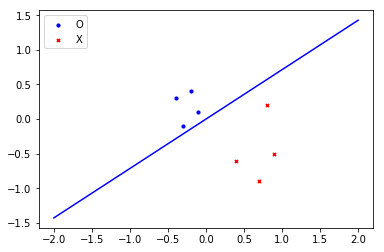

In [5]:
import matplotlib.pyplot as plt
import numpy as np

#網路上找的dataset 可以線性分割

dataset = np.array([
((1, -0.4, 0.3), -1),
((1, -0.3, -0.1), -1),
((1, -0.2, 0.4), -1),
((1, -0.1, 0.1), -1),
((1, 0.9, -0.5), 1),
((1, 0.7, -0.9), 1),
((1, 0.8, 0.2), 1),
((1, 0.4, -0.6),1)])

#判斷有沒有分類錯誤，並列印錯誤率

def check_error(w, dataset):
    result = None
    error = 0
    for x, s in dataset:
        x = np.array(x)
        if int(np.sign(w.T.dot(x))) != s:
            result =  x, s
            error += 1
            
    print ("error=%s/%s" % (error, len(dataset)))
    return result

#PLA演算法實作

def pla(dataset):
    w = np.zeros(3)
    while check_error(w, dataset) is not None:
        x, s = check_error(w, dataset)
        w += s * x
    return w


#執行

w = pla(dataset)

#畫圖

ps = [v[0] for v in dataset]
fig = plt.figure()
ax1 = fig.add_subplot(111) #表示1x1網格，第一個子圖
#dataset前半後半已經分割好 直接畫就是

ax1.scatter([v[1] for v in ps[:4]], [v[2] for v in ps[:4]], s=10, c='b', marker="o", label='O')
ax1.scatter([v[1] for v in ps[4:]], [v[2] for v in ps[4:]], s=10, c='r', marker="x", label='X')
l = np.linspace(-2,2)
a,b = -w[1]/w[2], -w[0]/w[2]
ax1.plot(l, a*l + b, 'b-')
plt.legend(loc='upper left');
plt.show()

In [12]:
import matplotlib.pyplot as plt
import numpy as np
# import data
train_data = open('PLA_train.txt','r')
pla_data = train_data.read()
pla_data = pla_data.split('\n')
nums1 = 0
# figure
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim(-0.5,0.5)
ax.set_ylim(-0.5,0.5)
# data type
for i in pla_data:
    pla_data[nums1] = i.split('\t')
    pla_data[nums1] = [float(x) for x in pla_data[nums1]]
    pla_data[nums1] = [(pla_data[nums1][0], pla_data[nums1][1]),
     pla_data[nums1][2]]
    if pla_data[nums1][1] == 1:
        ax.plot(pla_data[nums1][0][0],pla_data[nums1][0][1],'bo')
    elif pla_data[nums1][1] == -1:
        ax.plot(pla_data[nums1][0][0],pla_data[nums1][0][1],'rx')
    nums1 += 1
pla_data = np.asarray(pla_data)
print(pla_data)
train_data.close()
# naive LS PLA
def LS_pla(datas):
    w = np.zeros(2)
    error = 1
    while error:
        error = 0
        for x,s in datas:
            x = np.array(x)
            y = w.T.dot(x)
            try:
                ax.lines.remove(lines[0])
            except:
                pass
            xline = np.linspace(-0.5,0.5)
            lines = ax.plot(xline, -xline*w[0]/w[1])
            plt.pause(0.1)
            if np.sign(y) != np.sign(s):
                w += s * x
                error = 1
        if not error:
            break
    return w

W = LS_pla(pla_data)
print(W)
plt.ion()
plt.show()



FileNotFoundError: [Errno 2] No such file or directory: 'PLA_train.txt'